In [5]:
!conda install matplotlib -y
!conda install seaborn -y

## dataset link https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/eli970616/opt/miniconda3/envs/house-price

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-1.0.1                |     pyhff2d567_0         182 KB  conda-forge
    scipy-1.14.1               |  py310h9ad1863_1        14.6 MB  conda-forge
    seaborn-0.13.2             |       hd8ed1ab_2           7 KB  conda-forge
    seaborn-base-0.13.

In [7]:
import pandas as pd  # 用于数据读取和处理
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns  # 用于高级数据可视化

# 加载训练集和测试集
train_data = pd.read_csv('train.csv')  # 读取训练数据
test_data = pd.read_csv('test.csv')  # 读取测试数据

# 检查数据基本信息，包括数据类型和非空值情况
print("train")
print(train_data.info())

# 查看数据的前几行，了解数据内容和结构
print("train head")
print(train_data.head())


train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Ov

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


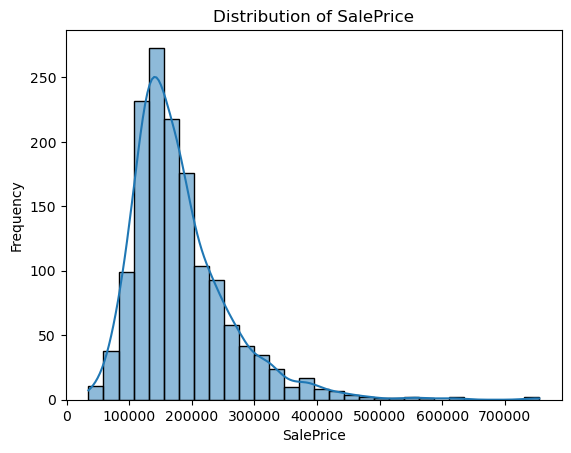

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [8]:
# 目标变量基本统计（如均值、标准差、最小值和最大值）
print(train_data['SalePrice'].describe())

# 可视化 SalePrice 的分布
sns.histplot(train_data['SalePrice'], kde=True, bins=30)  # KDE 曲线叠加柱状b图
plt.title('Distribution of SalePrice')  # 添加图标题
plt.xlabel('SalePrice')  # 添加 x 轴标签
plt.ylabel('Frequency')  # 添加 y 轴标签
plt.show()

# 计算 SalePrice 的偏度（skewness）和峰度（kurtosis）
# 偏度: 衡量分布是否对称；峰度: 衡量分布的尖锐程度
print("Skewness:", train_data['SalePrice'].skew()) # > 0 means it has right-tail/ skewed to right? 
print("Kurtosis:", train_data['SalePrice'].kurt())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


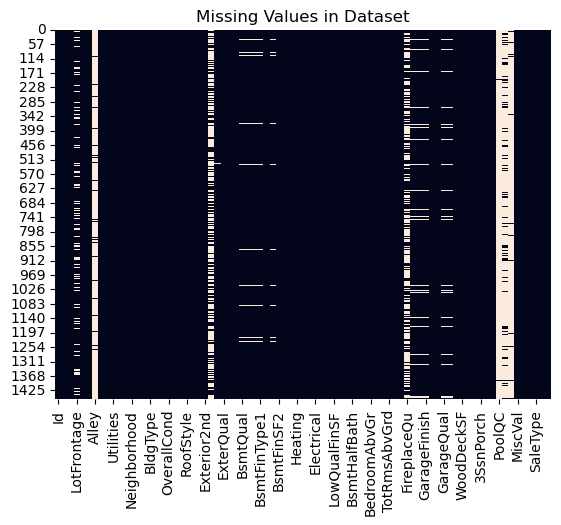

In [10]:
# 查看每一列的缺失值数量
missing_values = train_data.isnull().sum()  # 计算每列缺失值的数量
print(missing_values)
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)  # 仅保留有缺失值的列，并按缺失值数量排序
print(missing_values)

# 可视化缺失值分布情况
sns.heatmap(train_data.isnull(), cbar=False)  # 热力图显示哪些值缺失
plt.title('Missing Values in Dataset')  # 添加标题
plt.show()

# 分析结果后，你可以选择填充或删除缺失值。例如：
# train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)


Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


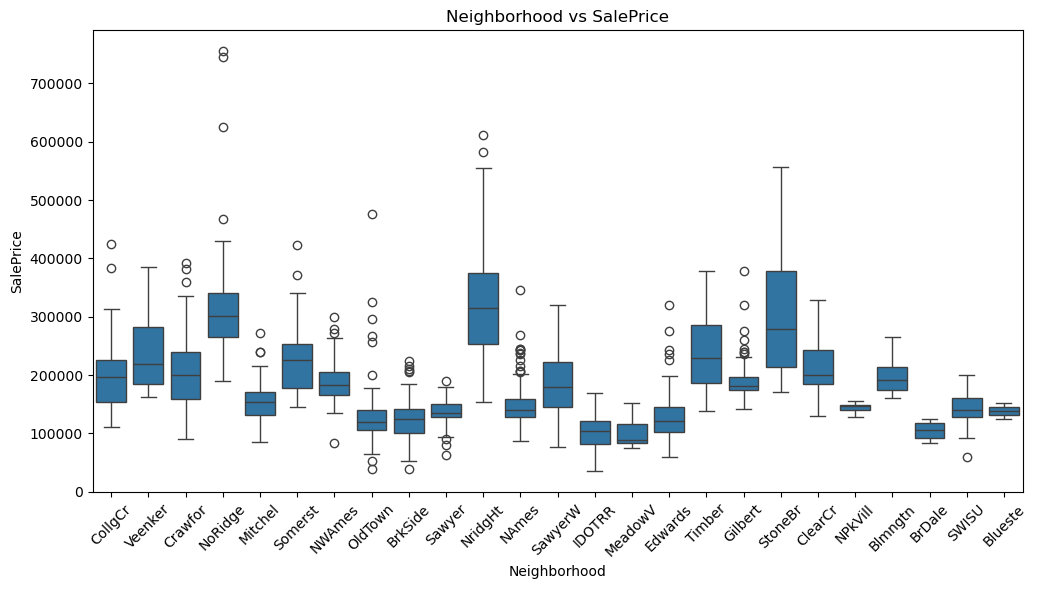

In [13]:
# 提取数据中的类别变量
categorical_cols = train_data.select_dtypes(include=['object']).columns  # 获取所有类型为 object 的列
print("Categorical columns:", categorical_cols)

# 可视化类别变量（以 Neighborhood 为例）与 SalePrice 的关系
plt.figure(figsize=(12, 6))  # 设置图形大小
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)  # 使用箱线图显示每个类别的 SalePrice 分布
plt.xticks(rotation=45)  # 旋转 x 轴标签，防止标签重叠
plt.title('Neighborhood vs SalePrice')  # 添加标题
plt.show()


Numerical columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Top 10 features most correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


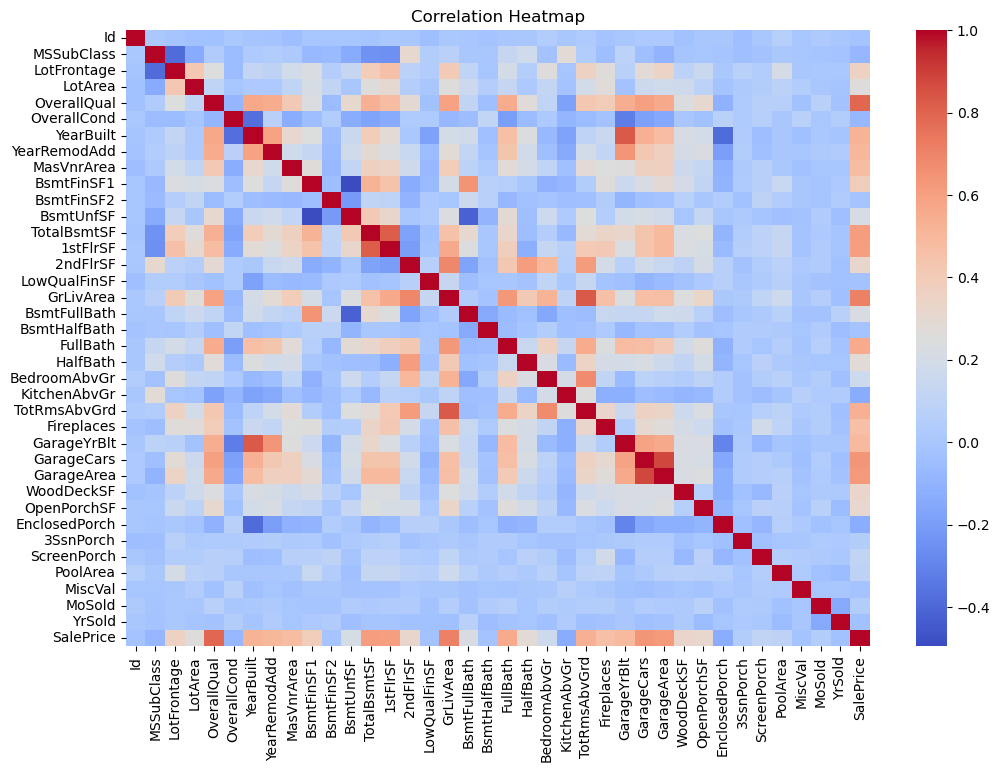

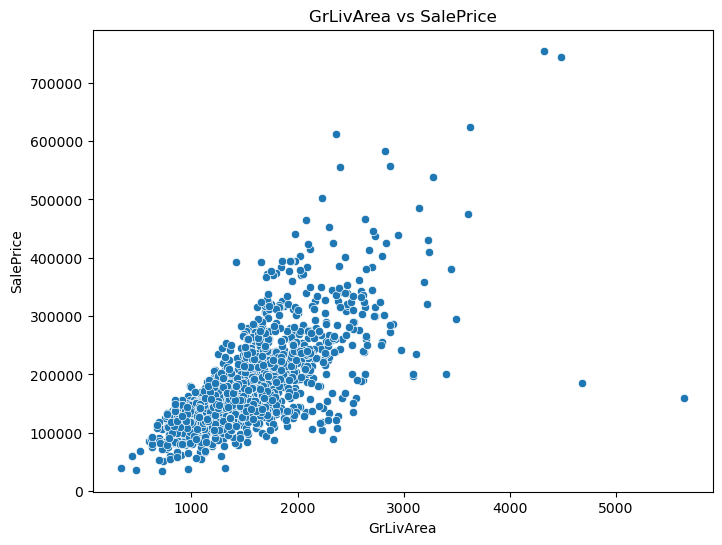

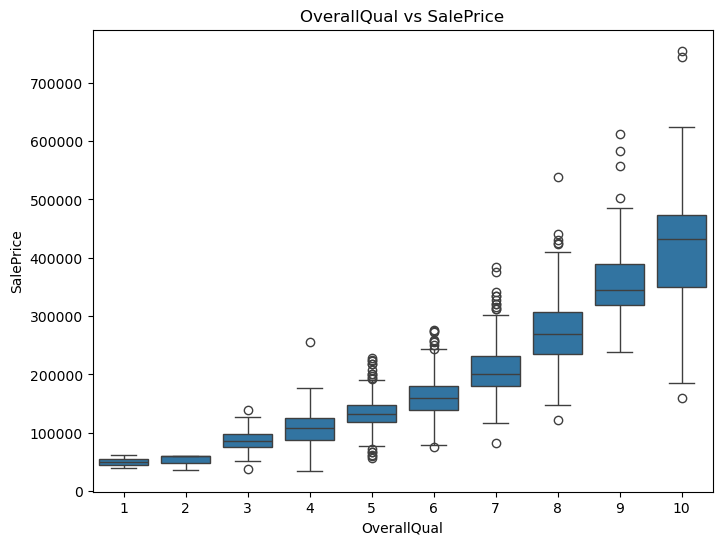

In [17]:
# 筛选数值变量列
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])  # 包含数值型列
print("Numerical columns:", numeric_data.columns)

# 计算相关性矩阵
correlation_matrix = numeric_data.corr()

# 提取与 SalePrice 相关性最高的前10个特征
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("Top 10 features most correlated with SalePrice:")
print(top_corr_features)

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")  # 不显示具体数值以保持简洁
plt.title('Correlation Heatmap')
plt.show()

# 散点图：GrLivArea（地上居住面积）与 SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# 散点图：OverallQual（总体质量评分）与 SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()




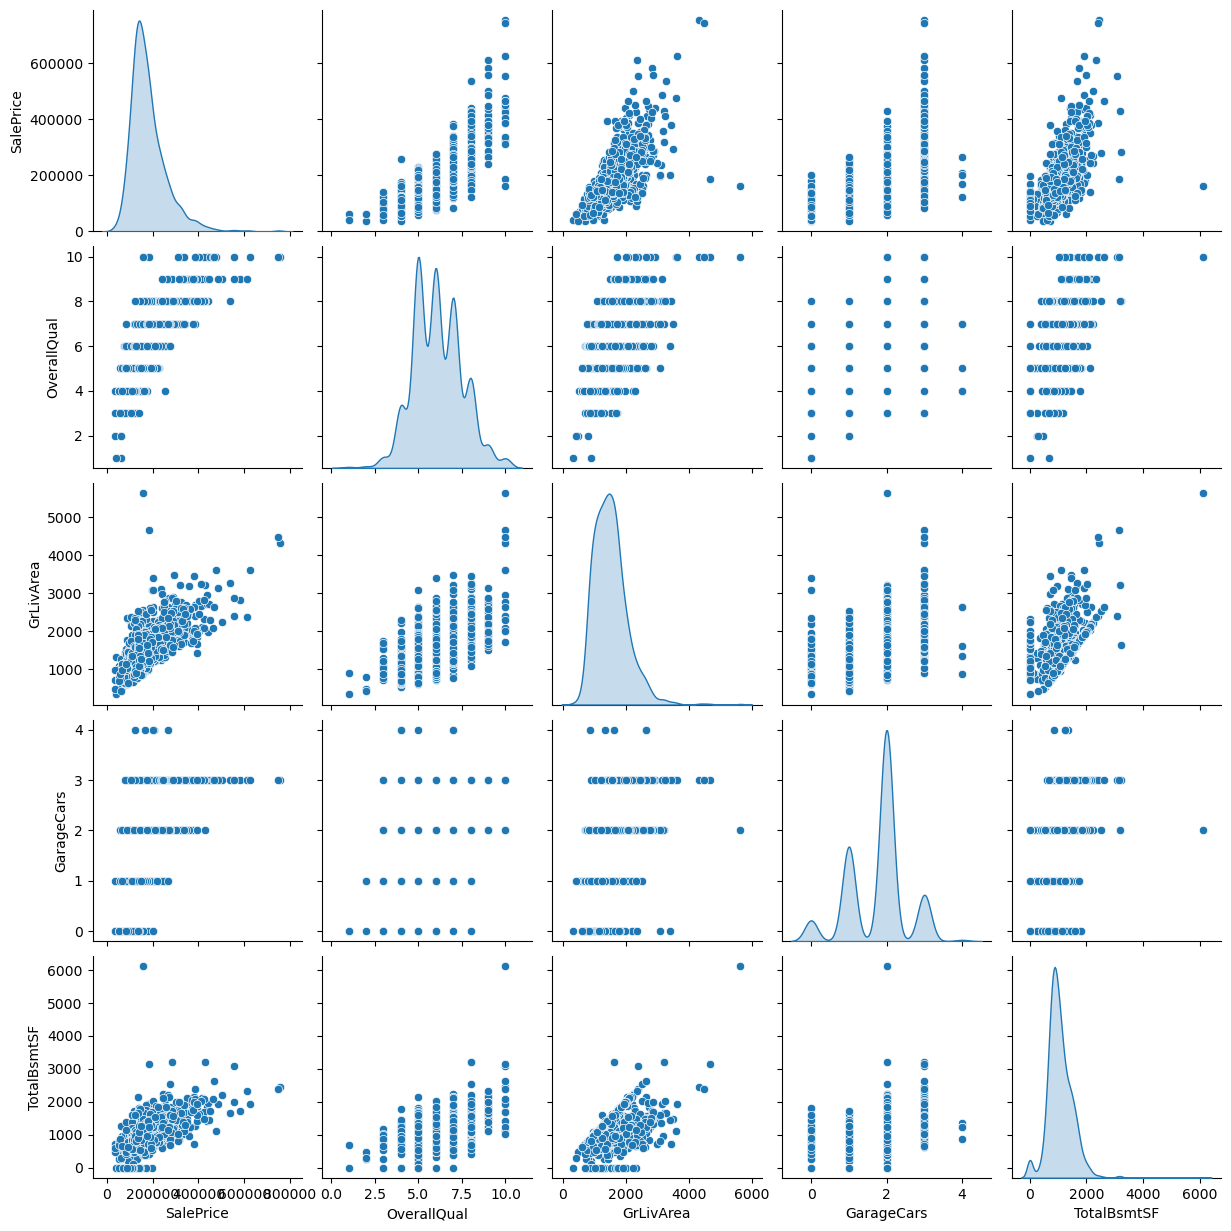

In [18]:
# 绘制与目标变量相关的特征的散点图矩阵
important_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']  # 选择几个重要特征
sns.pairplot(train_data[important_features], diag_kind='kde')  # 对角线显示 KDE 图
plt.show()


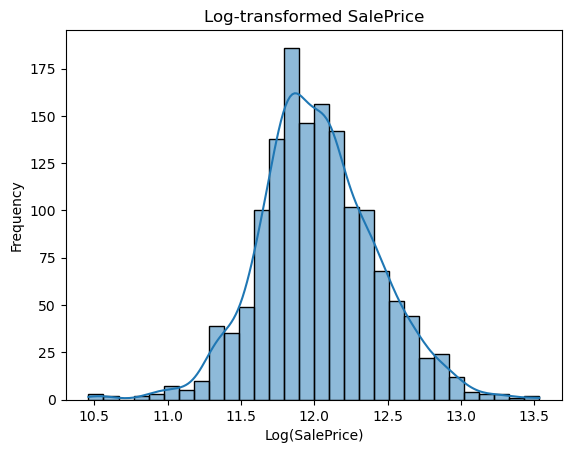

In [19]:
# 对目标变量进行对数变换，以减少偏度
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])  # 使用 log1p（log(1+x)）变换

# 再次可视化目标变量的分布
sns.histplot(train_data['SalePrice'], kde=True, bins=30)  # KDE 曲线叠加柱状图
plt.title('Log-transformed SalePrice')  # 添加图标题
plt.xlabel('Log(SalePrice)')  # 添加 x 轴标签
plt.ylabel('Frequency')  # 添加 y 轴标签
plt.show()


In [22]:
!conda install scikit-learn -y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 选择重要特征（假设已经通过相关性分析选出重要特征）
features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath']

# 将训练数据分成 X（特征）和 y（目标变量）
X = train_data[features]
y = train_data['SalePrice']

# 填充缺失值（确保数据无空值）
X = X.fillna(0)

# 对测试数据也做相同的处理
test_X = test_data[features].fillna(0)

# 将目标变量进行对数变换（如果之前对目标变量做了 log 变换）
y = np.log1p(y)


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/eli970616/opt/miniconda3/envs/house-price

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.4.2               |     pyhd8ed1ab_0         215 KB  conda-forge
    scikit-learn-1.5.2         |  py310h6e8b784_1         8.1 MB  conda-forge
    threadpoolctl-3.5.0        |     pyhc1e730c_0          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.3 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.4.2-pyhd8ed1ab_0
  scikit-learn       conda-

In [23]:
# 将训练数据分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 验证模型性能
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print("Validation Mean Squared Error:", mse)


Validation Mean Squared Error: 0.0002008714582227946


In [24]:
# 预测测试数据的房价
test_predictions = model.predict(test_X)

# 如果之前对 SalePrice 进行了对数变换，记得还原
test_predictions = np.expm1(test_predictions)

# 将结果保存为 CSV 文件
submission = pd.DataFrame({
    'Id': test_data['Id'],  # 测试数据的 Id 列
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)  # 保存为 submission.csv
print("Predictions saved to submission.csv")


Predictions saved to submission.csv
